# UN Exploration exercise for NSS DataScience 
Exercise github link: https://github.com/nss-data-science-cohort-9/un-exploration-sarahmulloy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4. Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.

In [29]:
gdp_df= pd.read_csv('../data/gdp_per_capita.csv.csv')
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
5,Afghanistan,2018,2902.392113,NaN
6,Afghanistan,2017,2952.998916,NaN
7,Afghanistan,2016,2958.785399,NaN
8,Afghanistan,2015,2967.692067,NaN
9,Afghanistan,2014,3017.942544,NaN


In [25]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
8209,Zimbabwe,1999,4238.195198,NaN
8210,Zimbabwe,1998,4342.858177,NaN
8211,Zimbabwe,1997,4304.406272,NaN
8212,Zimbabwe,1996,4271.479930,NaN
8213,Zimbabwe,1995,3935.280057,NaN
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


In [26]:
gdp_df.sample(10)

,Country or Area,Year,Value,Value Footnotes
429,Australia,1992,35342.068707,NaN
5897,Peru,2004,8497.498349,NaN
4002,Latin America & Caribbean,2003,14538.982330,NaN
662,Belgium,1997,46374.539898,NaN
2543,France,2020,49266.751899,NaN
2799,Grenada,2000,11632.174453,NaN
745,Bermuda,2016,92519.400772,NaN
7211,Switzerland,2017,77499.165225,NaN
8186,Zimbabwe,2022,3323.121932,NaN
7508,Timor-Leste,1991,2318.855041,NaN


### 5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [30]:
gdp_df= (
    gdp_df
    .drop('Value Footnotes', axis=1)
)
gdp_df.columns=['Country', 'Year', 'GDP_Per_Capita']
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168
2,Afghanistan,2021,2144.166570
3,Afghanistan,2020,2769.685745
4,Afghanistan,2019,2927.245144


### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [39]:
num_rows, num_col= gdp_df.shape
print(f"gdp_df has {num_rows} rows and {num_col} columns")

gdp_df.info();
#gdp_df.dtypes()
gdp_df.columns

gdp_df has 8219 rows and 3 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

**response**: gdf has mutliple datatypes in each column, as shown in the printed table above. The first column "Country or Area" is an object Dtype and most content are strings of country names. The second column "Year" is an intefer daatype, and the "Value" column is a float datatype, which means that it has numbers with decimal points. 

All of the columns have non-null values (so no "NaN" values to be addressed), and all three columns are the expected datatypes so nothing needs to be changed.

### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

The dataset covers 1990 - 2023


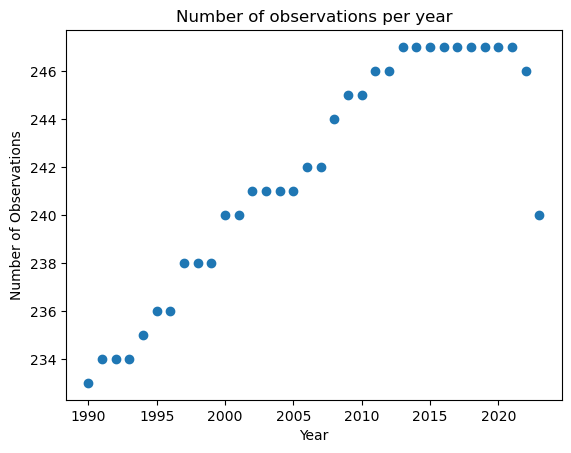

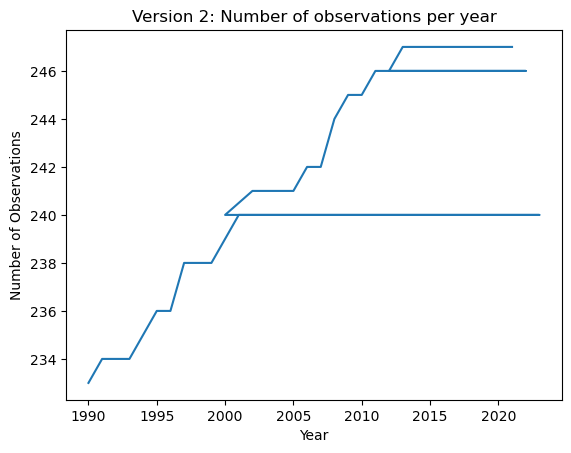

In [49]:
year_list= gdp_df['Year'].value_counts().index
print(f'The dataset covers {year_list.min()} - {year_list.max()}')
obs_by_year= gdp_df['Year'].value_counts().to_list()
year_data_as_series= gdp_df['Year'].value_counts()

plt.scatter(year_list, obs_by_year)
plt.xlabel("Year")
plt.ylabel('Number of Observations')
plt.title("Number of observations per year")
plt.show()

###
#Cleaner code
###
gdp_df['Year'].value_counts().plot()
plt.xlabel("Year")
plt.ylabel('Number of Observations')
plt.title("Version 2: Number of observations per year")
plt.show()

### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

The most observations per country is 34 and the least number of observations is 11


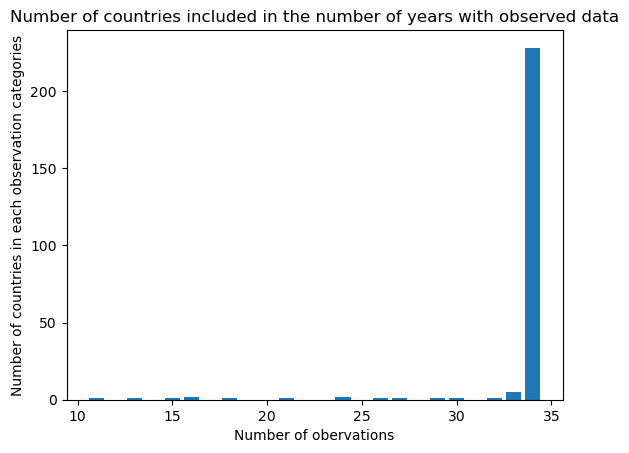

The country with the least amount of observations is Djibouti with 11 observations
14 observation categories only have 1 country represented


C:\Users\Mullo\AppData\Local\Temp\ipykernel_35776\3686199713.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nobs_min_ctry= nobs_grouped.loc[ctry_w_min_obs]['count'][0]


In [50]:
#calcualte the min and max number of observations for each country
min_num_obs_pct= gdp_df['Country'].value_counts().unique().min()
max_num_obs_pct= gdp_df['Country'].value_counts().unique().max()
print(f"The most observations per country is {max_num_obs_pct} and the least number of observations is {min_num_obs_pct}")

#calcualte the number of countries in each "observation count" category group by using groupby
nobs_grouped= pd.DataFrame(gdp_df['Country'].value_counts())
nobs_by_ctry= nobs_grouped.groupby('count')['count'].count()

#Make a plot by number of obervations per country (which means number of years with data for each country)
plt.bar(x= nobs_by_ctry.index, height=nobs_by_ctry)
plt.title("Number of countries included in the number of years with observed data")
plt.xlabel("Number of obervations")
plt.ylabel("Number of countries in each observation categories")
plt.show()

#pull out the country index name that has the least number of observations 
ctry_w_min_obs= nobs_grouped[nobs_grouped['count']== nobs_grouped['count'].min()].index
nobs_min_ctry= nobs_grouped.loc[ctry_w_min_obs]['count'][0]
# #Summarize the findings 
print(f"The country with the least amount of observations is {ctry_w_min_obs[0]} with {nobs_min_ctry} observations")

#Calculate the number of observations that only have 1 country 
nobs_onecty= (nobs_by_ctry == 1).count()

print(f"{nobs_onecty} observation categories only have 1 country represented")

In [9]:
#additional solution to streamline that analysis: 

#Sort by value_counts and then use 'n_largest', and use the keep='all' to include all the "tie" values 
large_country= gdp_df['Country or Area'].value_counts().nlargest(n=1, keep='all').index.to_list()
small_country= gdp_df['Country or Area'].value_counts().nsmallest(n=1, keep='all').index.to_list()

print(f'The country with the smallest number of observation is {small_country[0]}')
print(f'There are {len(large_country)} countries that have the largest number of observations')

The country with the smallest number of observation is Djibouti
There are 228 countries that have the largest number of observations


**response:** Djibouti likely has the least number of observations based on the sampling method of the UN. They may not have been able to collect data for all years based on their reporting methods.

## 9. Create a new dataframe by subsetting gdp_df to just the year 2021. Call this new dataframe gdp_2021.

In [10]:
gdp_2021= gdp_df[gdp_df['Year'] == 2021]
gdp_2021

,Country or Area,Year,Value
2,Afghanistan,2021,2144.166570
26,Africa Eastern and Southern,2021,3934.287267
60,Africa Western and Central,2021,4698.926894
94,Albania,2021,16113.136519
128,Algeria,2021,14496.865470
...,...,...,...
8067,Virgin Islands,2021,46893.549699
8089,West Bank and Gaza,2021,5663.121607
8119,World,2021,19637.823230
8153,Zambia,2021,3503.034914


### 10. Use .describe() to find the summary statistics for GDP per capita in 2021.

In [11]:
gdp_2021.describe()

,Year,Value
count,247.0,247.000000
mean,2021.0,24478.517262
std,0.0,24601.525764
min,2021.0,836.665571
25%,2021.0,5996.532844
50%,2021.0,15900.976581
75%,2021.0,37298.776853
max,2021.0,135379.291201


### 11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

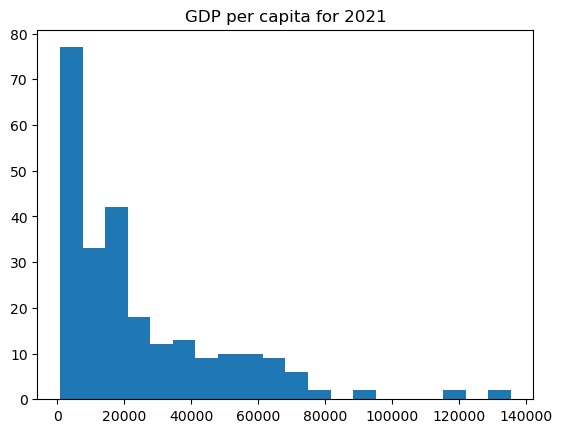

In [12]:
plt.hist(gdp_2021['Value'], bins=20);
plt.title("GDP per capita for 2021"); 

**response:** The histogram of GDP per capita for 2021 has a right skew, since there are some extreme values towards the right end of the x-axis

### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [13]:
#Sort the 2021 dataframe by value 
gdp_2021_sorted= gdp_2021.sort_values(by='Value', ascending=False)

top_five= gdp_2021_sorted.iloc[:5]
print("The top five countries by GDP are: \n", top_five['Country or Area'].values)
top_five

The top five countries by GDP are: 
 ['Luxembourg' 'Singapore' 'Ireland' 'Qatar' 'Bermuda']


,Country or Area,Year,Value
4425,Luxembourg,2021,135379.291201
6513,Singapore,2021,131864.092336
3492,Ireland,2021,118594.746862
6118,Qatar,2021,116832.570290
740,Bermuda,2021,92276.234605


In [14]:
bottom_five= gdp_2021_sorted.iloc[-5:]
print("The bottom five countries by GDP are: \n", bottom_five['Country or Area'].values)
bottom_five

The bottom five countries by GDP are: 
 ['Mozambique' 'Somalia' 'Dem. Rep. Congo' 'Central African Republic'
 'Burundi']


,Country or Area,Year,Value
5132,Mozambique,2021,1457.235409
6698,Somalia,2021,1392.464262
1733,Dem. Rep. Congo,2021,1313.618218
1301,Central African Republic,2021,1128.552380
1045,Burundi,2021,836.665571


## 13. Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2021 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named gdp_pivoted.

In [15]:
gdp_df_filter= gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2021)]
gdp_pivoted= gdp_df_filter.pivot_table(
    values="Value", 
    index="Country or Area", 
    columns="Year"
).dropna()

gdp_pivoted

Year,1990,2021
Country or Area,,
Africa Eastern and Southern,3386.854480,3934.287267
Africa Western and Central,3299.401375,4698.926894
Albania,5327.747458,16113.136519
Algeria,11728.545729,14496.865470
Andorra,50036.300776,59332.202910
...,...,...
Vanuatu,3101.680551,3135.836649
Viet Nam,2467.964601,12048.901994
World,11207.386344,19637.823230


In [16]:
gdp_pivoted.columns

Index([1990, 2021], dtype='int64', name='Year')

### 14. Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [17]:
gdp_pivoted['Percent_Change'] = ((gdp_pivoted[2021]-gdp_pivoted[1990])/(gdp_pivoted[1990]))*100
gdp_pivoted

Year,1990,2021,Percent_Change
Country or Area,,,
Africa Eastern and Southern,3386.854480,3934.287267,16.163458
Africa Western and Central,3299.401375,4698.926894,42.417559
Albania,5327.747458,16113.136519,202.438069
Algeria,11728.545729,14496.865470,23.603265
Andorra,50036.300776,59332.202910,18.578316
...,...,...,...
Vanuatu,3101.680551,3135.836649,1.101213
Viet Nam,2467.964601,12048.901994,388.212108
World,11207.386344,19637.823230,75.222149


### 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [18]:
n_countries= gdp_pivoted[gdp_pivoted['Percent_Change'] <0]['Percent_Change'].count()
print(f"{n_countries} had a negative percent change in GDP from 1990-2021")

n_countries= (gdp_pivoted['Percent_Change'] <0).sum()
print(f"{n_countries} had a negative percent change in GDP from 1990-2021")

23 had a negative percent change in GDP from 1990-2021
23 had a negative percent change in GDP from 1990-2021


### 16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2018. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

The country with the highest %change in GDP per capita between 1990 and 2021 is Equatorial Guinea
The country with the second highest %change in GDP per capita between 1990 and 2021 is China


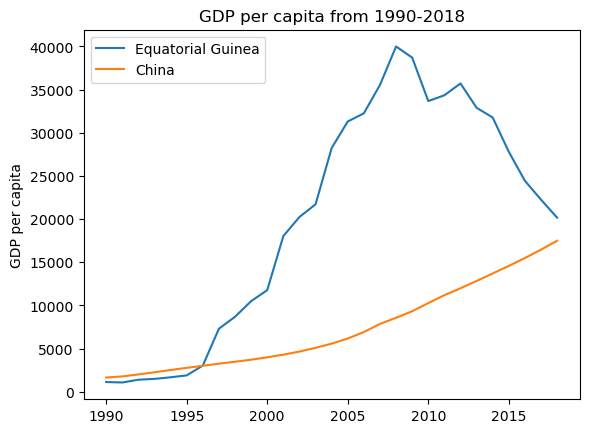

In [19]:
highest_gdp_ctry= gdp_pivoted['Percent_Change'].nlargest(1).index[0]
print(f'The country with the highest %change in GDP per capita between 1990 and 2021 is {highest_gdp_ctry}')

#Pull out all dataset for this country 
highest_gdp_ctry

#Create a graph with both top 2 countries in the same lineplot, by plotting a two-column dataframe 

sec_highest_gdp_ctry= gdp_pivoted['Percent_Change'].nlargest(2).index[1]
print(f'The country with the second highest %change in GDP per capita between 1990 and 2021 is {sec_highest_gdp_ctry}')

#pull out only two country data from original datagframe 
gdp_highest_pcgdp_2= gdp_df[(gdp_df['Country or Area'] == highest_gdp_ctry) | (gdp_df['Country or Area'] == sec_highest_gdp_ctry)]
gdp_highest_pcgdp_2
#create graph with both lines
forplot= gdp_highest_pcgdp_2[(gdp_highest_pcgdp_2['Year'] == 1990) | (gdp_highest_pcgdp_2['Year'] <= 2018)]
forplot= forplot.set_index('Year')
#filter and graph each plot

###
#creating a plot with both country information 
##

#x value- get all year info as a list
year_list= sorted(set(forplot.index)) 
#y value 1 = get all info for the specific country 1
top_c= forplot[forplot['Country or Area'] == highest_gdp_ctry]

#y value 2 = get all info for the specific country 1
top_2c= forplot[forplot['Country or Area'] == sec_highest_gdp_ctry]

#plot both lines together
plt.plot(top_c.index, top_c['Value'], label=f'{highest_gdp_ctry}');
plt.plot(top_2c.index, top_2c['Value'], label=f'{sec_highest_gdp_ctry}');
plt.ylabel('GDP per capita')
plt.title(f'GDP per capita from 1990-2018')
plt.legend();
plt.show()

## 17. Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [20]:
continents= pd.read_csv('../data/continents.csv')
continents

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola
...,...,...
211,Asia,Vietnam
212,Asia,West Bank and Gaza
213,Asia,Yemen
214,Africa,Zambia


#### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [45]:
gdp_df.columns
#gdp_df needs to change column name from 'country or area' to 'country'
gdp_df= gdp_df.rename(columns={'Country or Area' : 'Country'})

# continents
# pd.merge(
gdp_df= pd.merge(gdp_df, continents, 
         how='inner', 
         validate='many_to_one') #left_on='Country or Area', right_on='Country',

#display new dataframe
gdp_df

,Country,Year,Value,Continent
0,Afghanistan,2023,1992.424394,Asia
1,Afghanistan,2022,1981.710168,Asia
2,Afghanistan,2021,2144.166570,Asia
3,Afghanistan,2020,2769.685745,Asia
4,Afghanistan,2019,2927.245144,Asia
...,...,...,...,...
6258,Zimbabwe,1994,3965.730986,Africa
6259,Zimbabwe,1993,3634.750494,Africa
6260,Zimbabwe,1992,3649.891947,Africa
6261,Zimbabwe,1991,4126.405247,Africa


#### 19. Determine the number of countries per continent. Create a bar chart showing this.

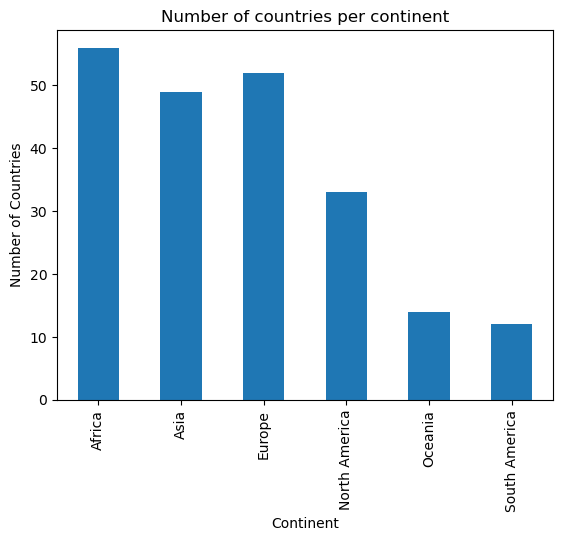

In [44]:
n_ctry_by_cont= continents.groupby('Continent')['Country'].count()
n_ctry_by_cont.plot(kind='bar');
plt.title('Number of countries per continent')
plt.ylabel('Number of Countries')
plt.show()

### 20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

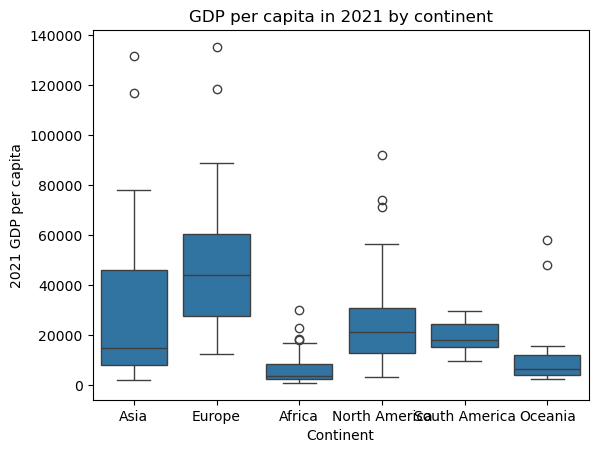

In [52]:
gdp_update_2021= gdp_df[gdp_df['Year']== 2021]

sns.boxplot(data= gdp_update_2021, x='Continent', y='Value')
plt.title('GDP per capita in 2021 by continent')
plt.ylabel('2021 GDP per capita')
plt.show()

## 21. Download the full csv containing Life expectancy at birth, total (years) from https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false. Read this data into a DataFrame named life_expectancy. Note: When reading this dataset it, you may encounter an error. Modify your read_csv call to correct this without modifying the original csv file.

In [104]:
life_expectancy=pd.read_csv(r"..\data\API_SP.DYN.LE00.IN_DS2_en_csv_v2_22997.csv", skiprows=4)
life_expectancy.head()
life_expectancy= life_expectancy.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])

#### 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use .melt() to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to Country, Year, and Life_Expectancy.

In [105]:
life_expectancy= life_expectancy.melt('Country Name')
life_expectancy.columns=['Country', 'Year', 'Life_Expectancy']
life_expectancy= life_expectancy.dropna() #clean up the dataframe 
life_expectancy

,Country,Year,Life_Expectancy
0,Aruba,1960,64.049000
1,Africa Eastern and Southern,1960,44.169658
2,Afghanistan,1960,32.799000
3,Africa Western and Central,1960,37.779636
4,Angola,1960,37.933000
...,...,...,...
17019,Kosovo,2023,78.033000
17020,"Yemen, Rep.",2023,69.295000
17021,South Africa,2023,66.139000
17022,Zambia,2023,66.349000


#### 23. What was the first country with a life expectancy to exceed 80?

--------------

24. Merge gdp_df and life_expectancy, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named gdp_le. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

25. Create a new DataFrame, named gdp_le_2021 by extracting data for the year 2021 from gdp_le. How many countries have a life expectancy of at least 80 in 2021?

26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?

29. Add a column to gdp_le_2021 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

Bonus: Solo Exploration:
Choose and download another data set from the UN data http://data.un.org/Explorer.aspx to explore. You may want to combine your new dataset with one or both of the datasets that you already worked with. Report any interesting correlations or trends that you find.
If time allows, check out the plotly library to add additional interativity to your plots. https://plotly.com/python/plotly-express/.